# t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. 

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
mnist=pd.read_csv('mnist.csv')

In [2]:
mnist.shape

(42000, 785)

In [3]:
mnist.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
l=mnist['label']
d=mnist.drop('label',axis=1)

In [7]:
d.shape

(42000, 784)

In [8]:
from sklearn.model_selection import train_test_split
d_train,d_test,l_train,l_test=train_test_split(d,l,test_size=0.3,random_state=42)

In [9]:
d_train.shape

(29400, 784)

In [10]:
d_test.shape

(12600, 784)

In [11]:
l_train.shape

(29400,)

In [12]:
l_test.shape

(12600,)

# Standardize The Data:

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit on training set only
scaler.fit(d_train)
#tranform on both test and training sets
d_train=scaler.transform(d_train)
d_test=scaler.transform(d_test)

# Apply TSNE and Visualize the data:

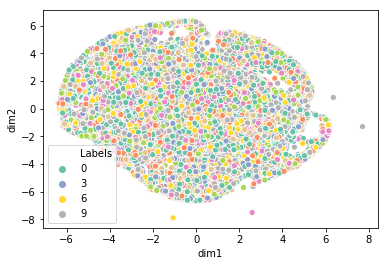

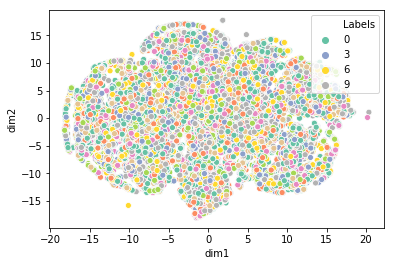

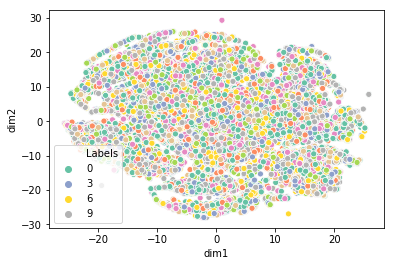

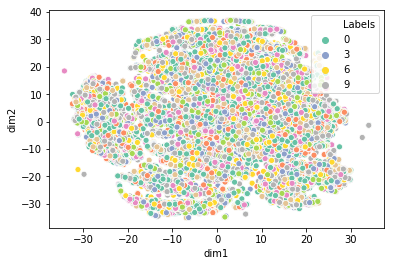

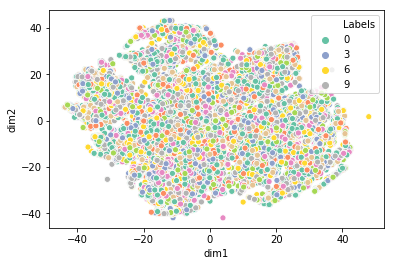

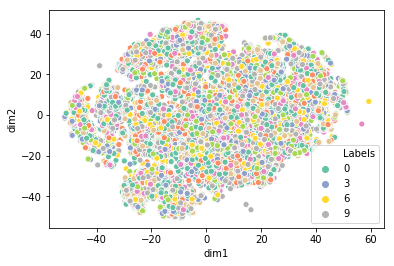

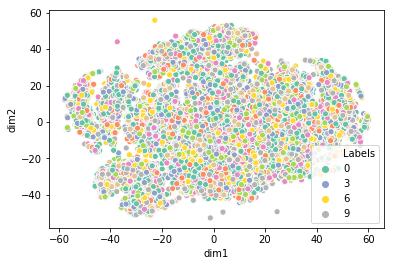

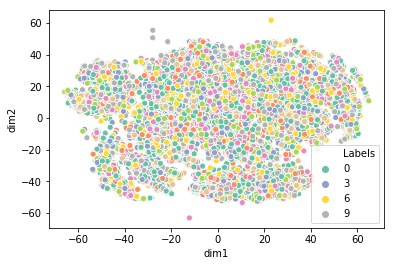

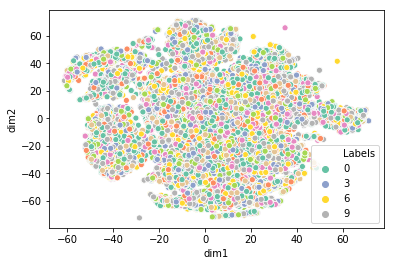

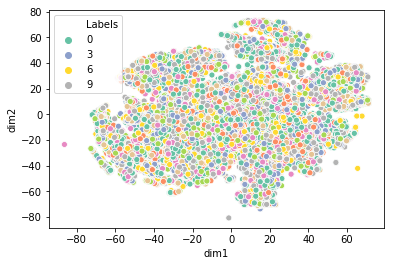

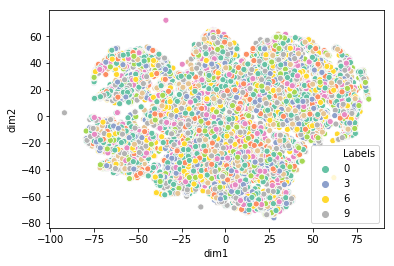

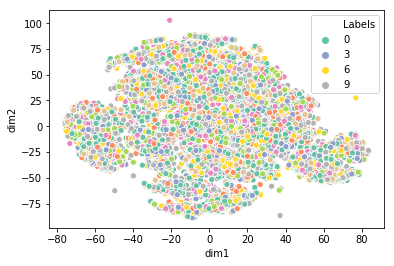

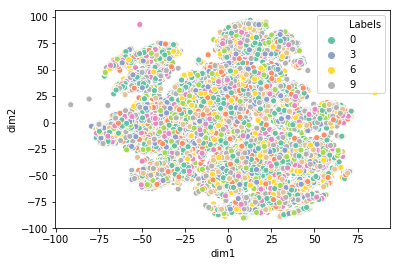

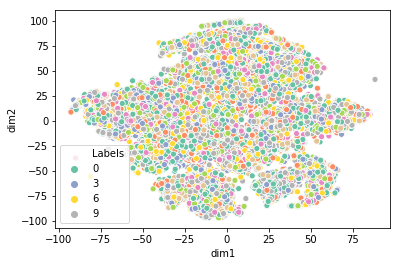

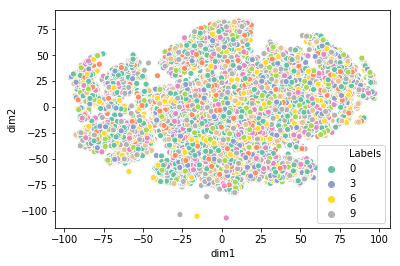

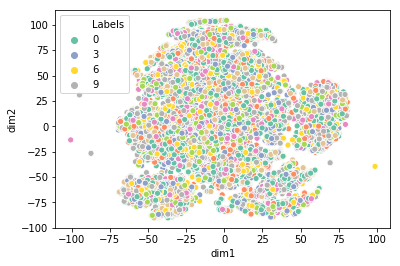

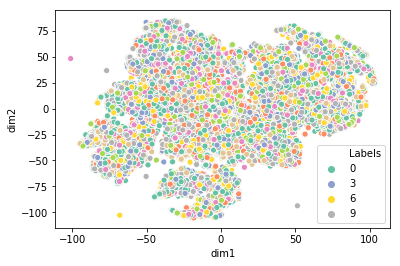

In [15]:
from sklearn.manifold import TSNE
import seaborn as sns
for i in range(300,2000,100):
    tsne=TSNE(n_components=2,n_iter=i,perplexity=70)
    x1=tsne.fit_transform(d_train)
    x1_df=pd.DataFrame(x1,columns=['dim1','dim2'])
    x1_df["Labels"]=l
    sns.scatterplot(data=x1_df,x="dim1",y="dim2",hue='Labels',palette='Set2')
    plt.show()

In [16]:
#shape after dimensionality reduction
x1.shape

(29400, 2)

#  # Apply Logistic Regression to the Transformed Data

In [17]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
#Model is learning the relationship between digits and labels
logisticRegr.fit(d_train,l_train)
# Predict for One Observation (image)
one=logisticRegr.predict(d_test[0].reshape(1,-1))
print(one)
# Predict for multiple Observation (image)
multi=logisticRegr.predict(d_test[0:10])
print(multi)

[8]
[8 1 9 9 8 6 2 2 7 1]


# Measuring Model Performance

In [18]:
logisticRegr.score(d_test, l_test)

0.9094444444444445

Text(0.5, 0, '784-feature')

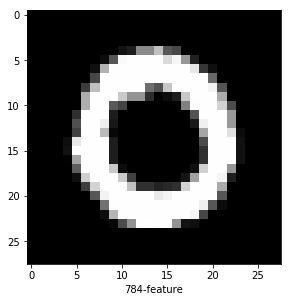

In [19]:
plt.figure(figsize=(10,12))
#original image
plt.subplot(1,2,1)
plt.imshow(d.iloc[1].values.reshape(28,28),
          cmap=plt.cm.gray,interpolation='nearest',clim=(0,255))
plt.xlabel('784-feature')

